In [ ]:
!pip install uproot
!pip install awkward
!pip install mplhep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 298 kB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.5 MB/s 
     |████████████████████████████████| 11.2 MB 39.7 MB/s 
     |████████████████████████████████| 930 kB 35.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgau

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward
import mplhep as hep
from array import array
#import Processor as pr
#import ROOT
from scipy.interpolate import interp1d
hep.style.use("CMS")

In [ ]:
path = '/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres'

file_SSM_600  = uproot.open(f'{path}/SSM_WP_600GeV_Transverse_Mass.root')["mass_histogram;1"]
file_SSM_1000 = uproot.open(f'{path}/SSM_WP_1000GeV_Transverse_Mass.root')["mass_histogram;1"]
file_SSM_1600 = uproot.open(f'{path}/SSM_WP_1600GeV_Transverse_Mass.root')["mass_histogram;1"]
file_SSM_2000 = uproot.open(f'{path}/SSM_WP_2000GeV_Transverse_Mass.root')["mass_histogram;1"]
file_SSM_2500 = uproot.open(f'{path}/SSM_WP_2500GeV_Transverse_Mass.root')["mass_histogram;1"]
file_SSM_3000 = uproot.open(f'{path}/SSM_WP_3000GeV_Transverse_Mass.root')["mass_histogram;1"]

file_LQ_500   = uproot.open(f'{path}/LQ_U1_500GeV_Invariant_Mass.root')["mass_histogram;1"]
file_LQ_1000  = uproot.open(f'{path}/LQ_U1_1000GeV_Invariant_Mass.root')["mass_histogram;1"]
file_LQ_1250  = uproot.open(f'{path}/LQ_U1_1250GeV_Invariant_Mass.root')["mass_histogram;1"]
file_LQ_1500  = uproot.open(f'{path}/LQ_U1_1500GeV_Invariant_Mass.root')["mass_histogram;1"]
file_LQ_2000  = uproot.open(f'{path}/LQ_U1_2000GeV_Invariant_Mass.root')["mass_histogram;1"]
file_LQ_3000  = uproot.open(f'{path}/LQ_U1_3000GeV_Invariant_Mass.root')["mass_histogram;1"]

file_EFT_s    = uproot.open(f'{path}/EFT_eps_s_Total_Mass.root')["mass_histogram;1"]
file_EFT_l    = uproot.open(f'{path}/EFT_eps_l_Total_Mass.root')["mass_histogram;1"]
file_EFT_t    = uproot.open(f'{path}/EFT_eps_t_Total_Mass.root')["mass_histogram;1"]

file_tt_bar_SSM = uproot.open(f'{path}/ttbar_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]
file_WPJ_SSM = uproot.open(f'{path}/W_plus_jets_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]
file_ZPJ_SSM = uproot.open(f'{path}/Z_plus_jets_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]

file_tt_bar_SSM = uproot.open(f'{path}/ttbar_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]
file_WPJ_SSM = uproot.open(f'{path}/W_plus_jets_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]
file_ZPJ_SSM = uproot.open(f'{path}/Z_plus_jets_SSM_cuts_Transverse_Mass.root')["mass_histogram;1"]

file_tt_bar_LQ = uproot.open(f'{path}/ttbar_LQ_U1_cuts_Invariant_Mass.root')["mass_histogram;1"]
file_WPJ_LQ = uproot.open(f'{path}/W_plus_jets_LQ_U1_cuts_Invariant_Mass.root')["mass_histogram;1"]
file_ZPJ_LQ = uproot.open(f'{path}/Z_plus_jets_LQ_U1_cuts_Invariant_Mass.root')["mass_histogram;1"]

file_tt_bar_EFT = uproot.open(f'{path}/ttbar_EFT_cuts_Total_Mass.root')["mass_histogram;1"]
file_WPJ_EFT = uproot.open(f'{path}/W_plus_jets_EFT_cuts_Total_Mass.root')["mass_histogram;1"]
file_ZPJ_EFT = uproot.open(f'{path}/Z_plus_jets_EFT_cuts_Total_Mass.root')["mass_histogram;1"]

In [ ]:
histograms_s = {'SSM_600':  [file_SSM_600.axis().edges(),  file_SSM_600.values(),  file_SSM_600.errors()],
                'SSM_1000': [file_SSM_1000.axis().edges(), file_SSM_1000.values(), file_SSM_1000.errors()],
                'SSM_1600': [file_SSM_1600.axis().edges(), file_SSM_1600.values(), file_SSM_1600.errors()],
                'SSM_2000': [file_SSM_2000.axis().edges(), file_SSM_2000.values(), file_SSM_2000.errors()],
                'SSM_2500': [file_SSM_2500.axis().edges(), file_SSM_2500.values(), file_SSM_2500.errors()],
                'SSM_3000': [file_SSM_3000.axis().edges(), file_SSM_3000.values(), file_SSM_3000.errors()],
                'LQ_500':  [file_LQ_500.axis().edges(),  file_LQ_500.values(),  file_LQ_500.errors()],
                'LQ_1000': [file_LQ_1000.axis().edges(), file_LQ_1000.values(), file_LQ_1000.errors()],
                'LQ_1250': [file_LQ_1250.axis().edges(), file_LQ_1250.values(), file_LQ_1250.errors()],
                'LQ_1500': [file_LQ_1500.axis().edges(), file_LQ_1500.values(), file_LQ_1500.errors()],
                'LQ_2000': [file_LQ_2000.axis().edges(), file_LQ_2000.values(), file_LQ_2000.errors()],
                'LQ_3000': [file_LQ_3000.axis().edges(), file_LQ_3000.values(), file_LQ_3000.errors()],
                'EFT_s': [file_EFT_s.axis().edges(), file_EFT_s.values(), file_EFT_s.errors()],
                'EFT_l': [file_EFT_l.axis().edges(), file_EFT_l.values(), file_EFT_l.errors()],
                'EFT_t': [file_EFT_t.axis().edges(), file_EFT_t.values(), file_EFT_t.errors()]}

histograms_b_SSM = {'tt_bar_SSM'  : [file_tt_bar_SSM.axis().edges(), file_tt_bar_SSM.values(), file_tt_bar_SSM.errors()],
                    'WPJ_SSM'     : [file_WPJ_SSM.axis().edges()   , file_WPJ_SSM.values()   , file_WPJ_SSM.errors()],
                    'ZPJ_SSM'     : [file_ZPJ_SSM.axis().edges()   , file_ZPJ_SSM.values()   , file_ZPJ_SSM.errors()]}
histograms_b_LQ = {'tt_bar_LQ'  : [file_tt_bar_LQ.axis().edges(), file_tt_bar_LQ.values(), file_tt_bar_LQ.errors()],
                   'WPJ_LQ'     : [file_WPJ_LQ.axis().edges()   , file_WPJ_LQ.values()   , file_WPJ_LQ.errors()],
                   'ZPJ_LQ'     : [file_ZPJ_LQ.axis().edges()   , file_ZPJ_LQ.values()   , file_ZPJ_LQ.errors()]}
histograms_b_EFT = {'tt_bar_EFT'  : [file_tt_bar_EFT.axis().edges(), file_tt_bar_EFT.values(), file_tt_bar_EFT.errors()],
                    'WPJ_EFT'     : [file_WPJ_EFT.axis().edges()   , file_WPJ_EFT.values()   , file_WPJ_EFT.errors()],
                    'ZPJ_EFT'     : [file_ZPJ_EFT.axis().edges()   , file_ZPJ_EFT.values()   , file_ZPJ_EFT.errors()]}

In [ ]:
events_s = {key: value[1].sum() for key, value in histograms_s.items()}
events_b_SSM = {key: value[1].sum() for key, value in histograms_b_SSM.items()}
events_b_LQ = {key: value[1].sum() for key, value in histograms_b_LQ.items()}
events_b_EFT = {key: value[1].sum() for key, value in histograms_b_EFT.items()}
events_s

{'EFT_l': 198.51,
 'EFT_s': 180.84,
 'EFT_t': 840.28503,
 'LQ_1000': 123.78001,
 'LQ_1250': 49.78715,
 'LQ_1500': 17.913115,
 'LQ_2000': 2.4835498,
 'LQ_3000': 0.06861234,
 'LQ_500': 1524.2496,
 'SSM_1000': 2608.2002,
 'SSM_1600': 245.97,
 'SSM_2000': 99.906784,
 'SSM_2500': 27.7875,
 'SSM_3000': 8.54433,
 'SSM_600': 6567.75}

In [ ]:
events_b_LQ

{'WPJ_LQ': 8.799219, 'ZPJ_LQ': 0.715605, 'tt_bar_LQ': 308.3333}

In [ ]:
Z = dict()
for key, val in events_s.items():
  if 'SSM' in key:
    Z[key] = val / np.sqrt(val + sum(events_b_SSM.values()))
  elif 'LQ' in key:
    Z[key] = val / np.sqrt(val + sum(events_b_LQ.values()))
  else:
    Z[key] = val / np.sqrt(val + sum(events_b_EFT.values()))

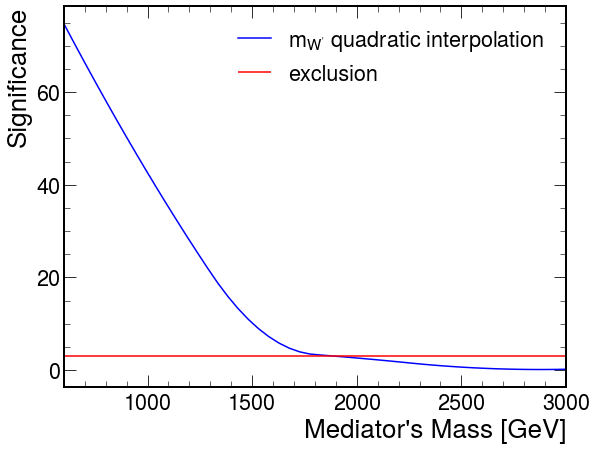

In [ ]:
m_wp = np.array([600, 1000, 1600, 2000, 2500, 3000])
m_lq = np.array([500, 1000, 1250, 1500, 2000, 3000])
Z_wp = np.array([74.80, 42.60, 6.606, 2.614, 0.643, 0.181])
Z_lq = np.array([35.48, 5.869, 2.585, 0.973, 0.138, 0.003])
inter_wp = interp1d(m_wp, Z_wp, kind= 'quadratic')
inter_lq = interp1d(m_lq, Z_lq, kind= 'quadratic')
m_wp_new = np.linspace(600, 3000, 50)
Z_wp_new = inter_wp(m_wp_new)
Z_lq_new = inter_lq(m_wp_new)
plt.figure(figsize = (9,7))
#plt.plot(m_wp,Z_wp, 'b', label = "$m_{W'}$ ")
plt.plot(m_wp_new, Z_wp_new, 'b', label = "$m_{W'}$ quadratic interpolation")
plt.xlim(600,3000)
plt.hlines(3,600, 3000, 'r', label = 'exclusion')
plt.xlabel("Mediator's Mass [GeV]")
plt.ylabel('Significance')
plt.legend();


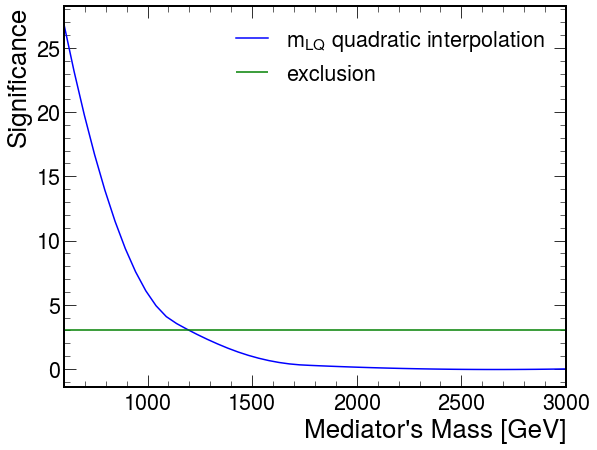

In [ ]:
#plt.plot(m_lq,Z_lq, 'b', label = "$m_{LQ}$")
plt.figure(figsize = (9,7))
plt.plot(m_wp_new, Z_lq_new, 'b',label = "$m_{LQ}$ quadratic interpolation")
#Solo interpolación cuadrática
#quitar leyenda
plt.xlim(600,3000)
plt.hlines(3,600, 3000, 'g', label = 'exclusion')
plt.xlabel("Mediator's Mass [GeV]")
plt.ylabel('Significance')
plt.legend();

$$N_{ev} = L \sigma$$
$$\sigma = \kappa \alpha^2$$
$$N_{ev} = L \kappa \alpha^2$$

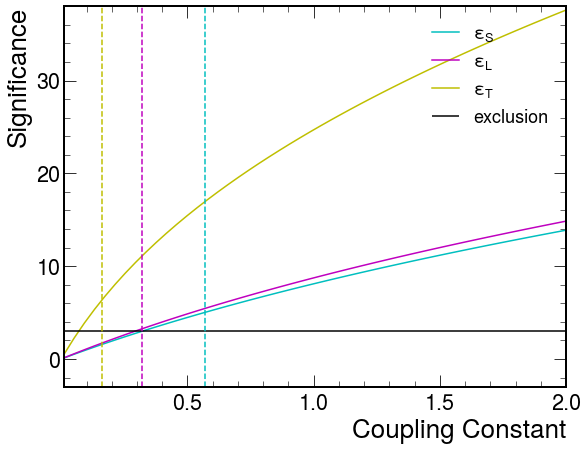

In [ ]:
lim_inf = 0.01
lim_sup = 2
couple = np.linspace(lim_inf, lim_sup, 50)
EFT_s_n_ev = events_s['EFT_s'] * couple
EFT_l_n_ev = events_s['EFT_l'] * couple
EFT_t_n_ev = events_s['EFT_t'] * couple
EFT_b_n_ev = sum(events_b_LQ.values())
Z_EFT_s = EFT_s_n_ev / np.sqrt(EFT_s_n_ev + EFT_b_n_ev)
Z_EFT_l = EFT_l_n_ev / np.sqrt(EFT_l_n_ev + EFT_b_n_ev)
Z_EFT_t = EFT_t_n_ev / np.sqrt(EFT_t_n_ev + EFT_b_n_ev)
s = 0.57
l = 0.32
t = 0.16
#vs = events_s['EFT_s'] * s
#vl = events_s['EFT_l'] * l
#vt = events_s['EFT_t'] * t
#z_vs =  vs / np.sqrt(vs + EFT_b_n_ev)
#z_vl =  vl / np.sqrt(vl + EFT_b_n_ev)
#z_vt =  vt / np.sqrt(vt + EFT_b_n_ev)

plt.figure(figsize = (9,7))
#plt.scatter([s], [z_vs], color = 'c')
#plt.scatter([l], [z_vl], color = 'm')
#plt.scatter([t], [z_vt], color = 'y')
#Poner mejor las lineas verticales
plt.plot(couple, Z_EFT_s, 'c', label = r'$\epsilon_{S}$')
plt.plot(couple, Z_EFT_l, 'm', label = r'$\epsilon_{L}$')
plt.plot(couple, Z_EFT_t, 'y', label = r'$\epsilon_{T}$')
plt.hlines(3,lim_inf, lim_sup, 'k', label = 'exclusion')
plt.vlines(s, -3, 38, 'c', linestyle = 'dashed')
plt.vlines(l, -3, 38, 'm', linestyle = 'dashed')
plt.vlines(t, -3, 38, 'y', linestyle = 'dashed')
plt.xlim(lim_inf, lim_sup)
plt.ylim(-3,38)


plt.xlabel("Coupling Constant")
plt.ylabel('Significance')
plt.legend(fontsize = 18, loc = 'upper right');